In [5]:
import pandas as pd
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as DT
import io
import numpy as np
from datetime import datetime, date 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,classification_report, jaccard_score, log_loss, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import time
import itertools
import statsmodels.api as sm

## 1. Downloading data and creating dataframes:
    - train.json and train.csv will be merged, same as test.json and test.csv
    
## 2. Preparing data:
    - checking how data look like, statistics, description
    - adding additional columns to dtaframes: 
        -Age (calculated based on DOB), 
        -Location_type, Location_from_type (creating bins for different size of locations), 
        -Groups (showing in how many groups is each user),
        -Seperating Hobby to different columns
    -handling missing data by dealting rows, filling missing data with mean/ median/ most frequent values 
    -delateing rows with oulier values
    
## 3. Data visualizastion, summary
    - visizalizastion of data
    - analysis of correlation
    - Splitting hobby column/ dummy data
    
## 4. Model building
    - preparing data sets - train and test dataframes
    
## 5. a) Logistic Regression
    - buidling ligistic regression model
    - creating confusion matrix
    - evaluation of model - checking accuracy, recall, f1, log loss
    - 
   ## b) Making predictions on test dataframe using LR model
    - predicting target for users from test data set

## 6. a) Building Classification Decision Trees Classifier model
    - buidling decision tree model
    - creating confusion matrix
    - evaluation of model - checking accuracy, recall, f1, log loss
    
   ## b) Making predictions on test dataframe using Decision Tree model
    - predicting target for users from test data set
    
## 7. Summary

# Downloading and opening files

In [6]:
with open(r'C:\Users\kasia\OneDrive\Pulpit\udemy\Github\Accenture\train.json', encoding="utf8") as f:

   data = json.load(f)


In [7]:
with open(r'C:\Users\kasia\OneDrive\Pulpit\udemy\Github\Accenture\test.json', encoding="utf8") as f:

   data2 = json.load(f)


In [8]:
def flatten_json(nested_json, exclude=['']):
    """Flatten json object with nested keys into a single level.
        Args:
            nested_json: A nested json object.
            exclude: Keys to exclude from output.
        Returns:
            The flattened json object if successful, None otherwise.
    """
    out = {}

    def flatten(x, name='', exclude=exclude):
        if type(x) is dict:
            for a in x:
                if a not in exclude: flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(nested_json)
    return out

In [9]:
train_j = pd.DataFrame([flatten_json(x) for x in data['data']])
test_j = pd.DataFrame([flatten_json(x) for x in data2['data']])

In [10]:
train_j.head()

,groups_data_0_group_name,groups_data_0_date_joined,groups_data_1_group_name,groups_data_1_date_joined,groups_data_2_group_name,groups_data_2_date_joined,groups_data_3_group_name,groups_data_3_date_joined,id,groups_data_4_group_name,...,groups_data_6_group_name,groups_data_6_date_joined,groups_data_7_group_name,groups_data_7_date_joined,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined,groups_data_10_group_name,groups_data_10_date_joined
0,Let's excercise together and lose a few kilo q...,2008-09-05 09:55:18.730066,Strongman competition,2008-05-22 21:25:22.572365,Fast food 4 life,2012-02-02 05:26:01.293628,alternative medicine - Hypnosis and bioenergot...,2008-07-05 05:47:12.254848,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tom Cruise group,2009-06-14 16:48:28.606142,Babysitters (Sokółka),2010-09-25 03:21:01.944684,Work abroad - join to find well paid work and ...,2010-09-21 23:44:39.499240,"Tennis, Squash, Badminton, table tennis - look...",2007-10-09 17:15:13.896508,1,Lost&Found (Sokółka),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Polish wildlife - best places,2007-07-29 18:15:49.603727,Politics and politicians,2010-10-03 21:00:27.154597,Pizza ! Best recipes,2010-08-25 22:26:48.331266,Animal rights group - join us if you care!,2010-11-02 12:41:37.753989,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Aspiring Writer,2009-09-08 15:49:57.132171,Nutrition & food advices,2010-12-02 18:19:30.887307,Game of thrones,2009-09-18 10:00:16.190795,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The ultimate house and electro group,2008-01-02 14:57:39.269135,Pirates of the Carribean,2012-03-05 03:28:37.972484,Musicians Available Poland (Osieczna),2009-12-21 13:48:10.887986,Housekeeping - looking for a housekeeper ? Joi...,2008-10-28 23:22:26.159789,4,Rooms for rent (Osieczna),...,Nutrition & food advices,2011-02-08 19:38:58.932003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
test_j.head()

,groups_data_0_group_name,groups_data_0_date_joined,groups_data_1_group_name,groups_data_1_date_joined,groups_data_2_group_name,groups_data_2_date_joined,id,groups_data_3_group_name,groups_data_3_date_joined,groups_data_4_group_name,...,groups_data_5_group_name,groups_data_5_date_joined,groups_data_6_group_name,groups_data_6_date_joined,groups_data_7_group_name,groups_data_7_date_joined,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined
0,Wedding planning - places and bands (and other...,2009-03-12 01:01:08.677427,Harry Potter and the Deathly Hollows,2009-01-15 01:38:06.822220,"Xbox , Playstation, Wii - console fans",2010-04-02 04:02:58.078934,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lost&Found (Strzegom),2010-02-01 14:13:34.551920,"Tennis, Squash, Badminton, table tennis - look...",2008-09-24 17:29:43.356992,Weightlifting - group for amateurs (Strzegom),2009-09-05 05:42:54.829993,1,Tarty mountains - hikers group,2008-09-28 08:02:34.377866,Life pro tips,...,The calse dancing group (Strzegom),2010-10-26 02:18:07.250624,"Octavia, Fabia, Roomster - Skoda lovers group",2009-12-28 18:58:32.014310,NaN,NaN,NaN,NaN,NaN,NaN
2,Cooking - italian cuisine,2009-04-30 06:51:31.250807,Tutoring - will teach / looking for a tutor (B...,2008-08-01 05:44:31.924780,Technical School of Electronics (Bielawa),2012-10-15 07:50:09.215434,2,"Young, fit and healthy - active livestyle = he...",2009-02-17 01:04:24.896927,Morgan Freeman - fangroup,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Social media,2008-06-11 14:02:47.449108,Game of thrones,2008-11-19 10:52:03.708652,Online job market - join us! (Żywiec),2009-05-30 17:22:59.249907,3,Will give away / sell /exchange (Żywiec),2008-11-26 09:14:23.770190,Arnold Schwarzenegger - shock the muscle!,...,Self-Taught Programmers,2007-05-25 05:50:08.656730,Lyceum no. 1 (Żywiec),2009-10-24 14:57:14.438275,NaN,NaN,NaN,NaN,NaN,NaN
4,Dancers' Group (Rzeszów),2011-02-11 08:40:37.091037,Bike trips (Rzeszów),2012-02-03 22:51:06.032864,Bored ? Join the group for loads of fun!,2008-04-05 07:35:11.064959,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
train_c = pd.read_csv(r"C:\Users\kasia\OneDrive\Pulpit\udemy\Github\Accenture\train.csv")
test_c = pd.read_csv(r"C:\Users\kasia\OneDrive\Pulpit\udemy\Github\Accenture\test.csv")

In [13]:
train_c.head()

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type
0,0,1,Halina,NaN,1982-08-07,Piastów,22732,Piastów,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa
1,1,0,Eustachy,male,1971-10-28,Sokółka,18331,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN
2,2,1,Egon,NaN,2000-07-05,Łaskarzew,4879,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN
3,3,0,Eulalia,female,1992-06-10,Bydgoszcz,352313,Bydgoszcz,352313,Customer services clerks,Badminton,88.0,164,In relationship,3.0,Visa
4,4,0,Hilary,NaN,1975-01-09,Osieczna,2322,Poznań,538633,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119,Married with kids,5.0,NaN


In [14]:
test_c.head()

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type
0,0,NaN,Dawid,male,1973-03-15,Kąty Wrocławskie,6846,Trzebinia,19954,Numerical and material recording clerks,Stretching,NaN,146,Single,1.0,Visa
1,1,NaN,Adam,male,1991-04-06,Strzegom,16272,Poznań,538633,"Food processing, wood working, garment and oth...","Gym,Kettleballs,Jewelry making",NaN,209,Married with kids,2.0,Visa
2,2,NaN,Adela,female,NaN,Bielawa,30207,Bielawa,30207,Health professionals,Fashion,39.0,213,Married,4.0,Visa
3,3,NaN,Gracja,female,1994-12-07,Żywiec,31560,Dobre Miasto,10293,Protective services workers,"Gym,Badminton,Rowing,Slacklining,Playing music...",42.0,287,Single,4.0,Mastercard
4,4,NaN,Anatol,male,1988-11-08,Rzeszów,189662,Olsztyn,173070,Information and communications technicians,"Orienteering,Skateboarding",NaN,226,In relationship,NaN,Mastercard


In [15]:
train = pd.concat([train_c, train_j], axis = 1)

In [16]:
train = train.drop('id', axis=1)
train.head()

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,...,groups_data_6_group_name,groups_data_6_date_joined,groups_data_7_group_name,groups_data_7_date_joined,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined,groups_data_10_group_name,groups_data_10_date_joined
0,0,1,Halina,NaN,1982-08-07,Piastów,22732,Piastów,22732,Teaching professionals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,Eustachy,male,1971-10-28,Sokółka,18331,Sokółka,18331,General and keyboard clerks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,Egon,NaN,2000-07-05,Łaskarzew,4879,Łaskarzew,4879,Protective services workers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,Eulalia,female,1992-06-10,Bydgoszcz,352313,Bydgoszcz,352313,Customer services clerks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,Hilary,NaN,1975-01-09,Osieczna,2322,Poznań,538633,Refuse workers and other elementary workers,...,Nutrition & food advices,2011-02-08 19:38:58.932003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
test = pd.concat([test_c, test_j], axis = 1)

In [18]:
test = test.drop('id', axis=1)
test.head()

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,...,groups_data_5_group_name,groups_data_5_date_joined,groups_data_6_group_name,groups_data_6_date_joined,groups_data_7_group_name,groups_data_7_date_joined,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined
0,0,NaN,Dawid,male,1973-03-15,Kąty Wrocławskie,6846,Trzebinia,19954,Numerical and material recording clerks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,Adam,male,1991-04-06,Strzegom,16272,Poznań,538633,"Food processing, wood working, garment and oth...",...,The calse dancing group (Strzegom),2010-10-26 02:18:07.250624,"Octavia, Fabia, Roomster - Skoda lovers group",2009-12-28 18:58:32.014310,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,Adela,female,NaN,Bielawa,30207,Bielawa,30207,Health professionals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,Gracja,female,1994-12-07,Żywiec,31560,Dobre Miasto,10293,Protective services workers,...,Self-Taught Programmers,2007-05-25 05:50:08.656730,Lyceum no. 1 (Żywiec),2009-10-24 14:57:14.438275,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,Anatol,male,1988-11-08,Rzeszów,189662,Olsztyn,173070,Information and communications technicians,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Preparing data

## Adding additional columns

In [19]:
train.describe()

,user_id,target,location_population,location_from_population,daily_commute,friends_number,education
count,4000.000000,4000.000000,4.000000e+03,4.000000e+03,3595.000000,4000.000000,3592.000000
mean,1999.500000,0.201500,3.105877e+05,2.910267e+05,50.098748,199.877750,3.670935
std,1154.844867,0.401171,4.878360e+05,4.717641e+05,28.806060,90.494937,1.327582
min,0.000000,0.000000,7.860000e+02,1.031000e+03,0.000000,0.000000,1.000000
25%,999.750000,0.000000,2.435725e+04,2.422050e+04,25.000000,143.000000,3.000000
50%,1999.500000,0.000000,8.007200e+04,7.379100e+04,50.000000,199.000000,4.000000
75%,2999.250000,0.000000,3.523130e+05,3.398500e+05,75.000000,256.000000,5.000000
max,3999.000000,1.000000,1.764615e+06,1.764615e+06,99.000000,619.000000,6.000000


In [20]:
test.describe()

,user_id,target,location_population,location_from_population,daily_commute,friends_number,education
count,2000.000000,0.0,2.000000e+03,2.000000e+03,1796.000000,2000.00000,1817.000000
mean,999.500000,NaN,3.336566e+05,3.096158e+05,49.928731,199.95200,3.644469
std,577.494589,NaN,5.114764e+05,4.962898e+05,28.881555,89.91402,1.350136
min,0.000000,NaN,9.920000e+02,8.960000e+02,0.000000,0.00000,1.000000
25%,499.750000,NaN,2.609200e+04,2.390700e+04,26.000000,144.00000,3.000000
50%,999.500000,NaN,9.562900e+04,7.765300e+04,49.000000,199.00000,4.000000
75%,1499.250000,NaN,4.038830e+05,3.398500e+05,75.000000,254.00000,5.000000
max,1999.000000,NaN,1.764615e+06,1.764615e+06,99.000000,543.00000,6.000000


In [21]:
train.describe(include = "all")

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,...,groups_data_6_group_name,groups_data_6_date_joined,groups_data_7_group_name,groups_data_7_date_joined,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined,groups_data_10_group_name,groups_data_10_date_joined
count,4000.000000,4000.000000,3982,3616,3606,4000,4.000000e+03,4000,4.000000e+03,4000,...,333,333,132,132,53,53,11,11,1,1
unique,NaN,NaN,205,2,3242,645,NaN,650,NaN,43,...,234,333,118,132,50,53,11,11,1,1
top,NaN,NaN,Franciszek,female,2000-03-20,Warszawa,NaN,Warszawa,NaN,Science and engineering associate professionals,...,Runnning. Advices from profesionals to newbies.,2011-02-08 19:38:58.932003,Animal rights group - join us if you care!,2010-09-04 08:02:08.798827,Fitness and workout anytime,2010-01-17 13:46:51.352061,Offline and online cooking school (Chrzanów),2011-06-21 05:01:35.480002,Running - global group. Events and news.,2011-04-03 05:35:54.137775
freq,NaN,NaN,38,2040,4,332,NaN,306,NaN,106,...,6,1,3,1,2,1,1,1,1,1
mean,1999.500000,0.201500,NaN,NaN,NaN,NaN,3.105877e+05,NaN,2.910267e+05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1154.844867,0.401171,NaN,NaN,NaN,NaN,4.878360e+05,NaN,4.717641e+05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,7.860000e+02,NaN,1.031000e+03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,999.750000,0.000000,NaN,NaN,NaN,NaN,2.435725e+04,NaN,2.422050e+04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1999.500000,0.000000,NaN,NaN,NaN,NaN,8.007200e+04,NaN,7.379100e+04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2999.250000,0.000000,NaN,NaN,NaN,NaN,3.523130e+05,NaN,3.398500e+05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Adding column age

In [22]:
#changing type of 'dob' column to datetime
now = pd.Timestamp('now')

In [23]:
df_list = [train, test]

In [24]:
for df in df_list:
    df['dob'] = pd.to_datetime(df['dob'], format='%Y/%m/%d')
    df['dob'] = df['dob'].where(df['dob'] < now, df['dob'] - np.timedelta64(100, 'Y'))
    df['age'] = (now - df['dob']).astype('<m8[Y]')

In [25]:
train.head()

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,...,groups_data_6_date_joined,groups_data_7_group_name,groups_data_7_date_joined,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined,groups_data_10_group_name,groups_data_10_date_joined,age
0,0,1,Halina,NaN,1982-08-07,Piastów,22732,Piastów,22732,Teaching professionals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0
1,1,0,Eustachy,male,1971-10-28,Sokółka,18331,Sokółka,18331,General and keyboard clerks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0
2,2,1,Egon,NaN,2000-07-05,Łaskarzew,4879,Łaskarzew,4879,Protective services workers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
3,3,0,Eulalia,female,1992-06-10,Bydgoszcz,352313,Bydgoszcz,352313,Customer services clerks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0
4,4,0,Hilary,NaN,1975-01-09,Osieczna,2322,Poznań,538633,Refuse workers and other elementary workers,...,2011-02-08 19:38:58.932003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0


## Adding columns location_type and location_from_type

In [26]:
train['location_population'].quantile([0.25,0.5,0.75])

0.25     24357.25
0.50     80072.00
0.75    352313.00
Name: location_population, dtype: float64

In [27]:
train['location_from_population'].quantile([0.25,0.5,0.75])

0.25     24220.5
0.50     73791.0
0.75    339850.0
Name: location_from_population, dtype: float64

Creating two new columns which will idciate type of the city:

- (4) Large City >200000
- (3) Midsize City> 50000
- (2) Small City >2000
- (1) Rural<2000

In [28]:
bins = [0, 2000, 50000, 200000, 2000000]

In [29]:
for df in df_list:
    df['location_type'] = pd.cut(df['location_population'].values, bins,labels = [1, 2, 3, 4])
    df['location_from_type'] = pd.cut(df['location_from_population'].values, bins,labels = [1, 2, 3, 4])

In [30]:
test.head()

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,...,groups_data_6_date_joined,groups_data_7_group_name,groups_data_7_date_joined,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined,age,location_type,location_from_type
0,0,NaN,Dawid,male,1973-03-15,Kąty Wrocławskie,6846,Trzebinia,19954,Numerical and material recording clerks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,2,2
1,1,NaN,Adam,male,1991-04-06,Strzegom,16272,Poznań,538633,"Food processing, wood working, garment and oth...",...,2009-12-28 18:58:32.014310,NaN,NaN,NaN,NaN,NaN,NaN,32.0,2,4
2,2,NaN,Adela,female,NaT,Bielawa,30207,Bielawa,30207,Health professionals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
3,3,NaN,Gracja,female,1994-12-07,Żywiec,31560,Dobre Miasto,10293,Protective services workers,...,2009-10-24 14:57:14.438275,NaN,NaN,NaN,NaN,NaN,NaN,29.0,2,2
4,4,NaN,Anatol,male,1988-11-08,Rzeszów,189662,Olsztyn,173070,Information and communications technicians,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,3,3


## Adding column groups

In [31]:
groups = train[['groups_data_0_group_name', 'groups_data_1_group_name', 'groups_data_2_group_name',\
                'groups_data_3_group_name', 'groups_data_4_group_name', 'groups_data_5_group_name',\
               'groups_data_6_group_name', 'groups_data_7_group_name', 'groups_data_8_group_name',\
               'groups_data_9_group_name', 'groups_data_10_group_name'
               ]]
#groups = groups.fillna(0)
groups.head()

,groups_data_0_group_name,groups_data_1_group_name,groups_data_2_group_name,groups_data_3_group_name,groups_data_4_group_name,groups_data_5_group_name,groups_data_6_group_name,groups_data_7_group_name,groups_data_8_group_name,groups_data_9_group_name,groups_data_10_group_name
0,Let's excercise together and lose a few kilo q...,Strongman competition,Fast food 4 life,alternative medicine - Hypnosis and bioenergot...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tom Cruise group,Babysitters (Sokółka),Work abroad - join to find well paid work and ...,"Tennis, Squash, Badminton, table tennis - look...",Lost&Found (Sokółka),NaN,NaN,NaN,NaN,NaN,NaN
2,Polish wildlife - best places,Politics and politicians,Pizza ! Best recipes,Animal rights group - join us if you care!,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Aspiring Writer,Nutrition & food advices,Game of thrones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The ultimate house and electro group,Pirates of the Carribean,Musicians Available Poland (Osieczna),Housekeeping - looking for a housekeeper ? Joi...,Rooms for rent (Osieczna),Counter strike - global ladderboard,Nutrition & food advices,NaN,NaN,NaN,NaN


In [32]:
groups['groups'] = groups.count(axis = 1)
groups.head()


C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\270133800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groups['groups'] = groups.count(axis = 1)


,groups_data_0_group_name,groups_data_1_group_name,groups_data_2_group_name,groups_data_3_group_name,groups_data_4_group_name,groups_data_5_group_name,groups_data_6_group_name,groups_data_7_group_name,groups_data_8_group_name,groups_data_9_group_name,groups_data_10_group_name,groups
0,Let's excercise together and lose a few kilo q...,Strongman competition,Fast food 4 life,alternative medicine - Hypnosis and bioenergot...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,Tom Cruise group,Babysitters (Sokółka),Work abroad - join to find well paid work and ...,"Tennis, Squash, Badminton, table tennis - look...",Lost&Found (Sokółka),NaN,NaN,NaN,NaN,NaN,NaN,5
2,Polish wildlife - best places,Politics and politicians,Pizza ! Best recipes,Animal rights group - join us if you care!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,The Aspiring Writer,Nutrition & food advices,Game of thrones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,The ultimate house and electro group,Pirates of the Carribean,Musicians Available Poland (Osieczna),Housekeeping - looking for a housekeeper ? Joi...,Rooms for rent (Osieczna),Counter strike - global ladderboard,Nutrition & food advices,NaN,NaN,NaN,NaN,7


In [33]:
train = pd.concat([train, groups['groups']], axis = 1)
train.head()

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,...,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined,groups_data_10_group_name,groups_data_10_date_joined,age,location_type,location_from_type,groups
0,0,1,Halina,NaN,1982-08-07,Piastów,22732,Piastów,22732,Teaching professionals,...,NaN,NaN,NaN,NaN,NaN,NaN,41.0,2,2,4
1,1,0,Eustachy,male,1971-10-28,Sokółka,18331,Sokółka,18331,General and keyboard clerks,...,NaN,NaN,NaN,NaN,NaN,NaN,52.0,2,2,5
2,2,1,Egon,NaN,2000-07-05,Łaskarzew,4879,Łaskarzew,4879,Protective services workers,...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,2,2,4
3,3,0,Eulalia,female,1992-06-10,Bydgoszcz,352313,Bydgoszcz,352313,Customer services clerks,...,NaN,NaN,NaN,NaN,NaN,NaN,31.0,4,4,3
4,4,0,Hilary,NaN,1975-01-09,Osieczna,2322,Poznań,538633,Refuse workers and other elementary workers,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,2,4,7


In [34]:
groups_test = test[['groups_data_0_group_name', 'groups_data_1_group_name', 'groups_data_2_group_name',\
                'groups_data_3_group_name', 'groups_data_4_group_name', 'groups_data_5_group_name',\
               'groups_data_6_group_name', 'groups_data_7_group_name', 'groups_data_8_group_name',\
               'groups_data_9_group_name']]

groups_test['groups'] = groups_test.count(axis = 1)
test = pd.concat([test, groups_test['groups']], axis = 1)

C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\1660873091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groups_test['groups'] = groups_test.count(axis = 1)


## Handling missing data and detecting outliers

In [35]:
#checking how many data is missing in each column
train.isnull().sum()

user_id                          0
target                           0
name                            18
sex                            384
dob                            394
location                         0
location_population              0
location_from                    0
location_from_population         0
occupation                       0
hobbies                        680
daily_commute                  405
friends_number                   0
relationship_status            393
education                      408
credit_card_type               428
groups_data_0_group_name        56
groups_data_0_date_joined       56
groups_data_1_group_name       275
groups_data_1_date_joined      275
groups_data_2_group_name       780
groups_data_2_date_joined      780
groups_data_3_group_name      1608
groups_data_3_date_joined     1608
groups_data_4_group_name      2481
groups_data_4_date_joined     2481
groups_data_5_group_name      3212
groups_data_5_date_joined     3212
groups_data_6_group_

In [36]:
test.isnull().sum()

user_id                         0
target                       2000
name                            6
sex                           191
dob                           191
location                        0
location_population             0
location_from                   0
location_from_population        0
occupation                      0
hobbies                       316
daily_commute                 204
friends_number                  0
relationship_status           230
education                     183
credit_card_type              205
groups_data_0_group_name       26
groups_data_0_date_joined      26
groups_data_1_group_name      144
groups_data_1_date_joined     144
groups_data_2_group_name      382
groups_data_2_date_joined     382
groups_data_3_group_name      810
groups_data_3_date_joined     810
groups_data_4_group_name     1246
groups_data_4_date_joined    1246
groups_data_5_group_name     1608
groups_data_5_date_joined    1608
groups_data_6_group_name     1822
groups_data_6_

## Filling missing data in sex columns
Female names end with letter "a". Based on name we can find wgat sex should be assigned for each user. 

In [37]:
#checking how many users are men and women
train['sex'].value_counts()

female    2040
male      1576
Name: sex, dtype: int64

In [38]:
df_list = [train, test]

In [39]:
#filling missing data in sex column where the name is female
for df in df_list:
    sex_na = df[df.sex.isna()] 
    sex_na = sex_na[['name', 'sex']]
    sex_na = sex_na[sex_na['name'].notna()]
    #selecting all female names - names endinf with letter "a" are female
    sex_na_f = sex_na[sex_na['name'].str.endswith('a')]
    #making a list of indexes where name is female  
    index_female = sex_na_f['sex'].index.values.tolist()
    #applying changes in dfs
    df.loc[index_female, 'sex'] = df.loc[index_female, 'sex'].fillna(value='female')
    

In [40]:
train['sex'].value_counts()

female    2243
male      1576
Name: sex, dtype: int64

In [41]:
train['sex'].isna().value_counts()

False    3819
True      181
Name: sex, dtype: int64

In [42]:
#filling missing data for male names
for df in df_list:
    sex_male = df[df['sex'].isna()]
    sex_male = sex_male[sex_male['name'].notna()]
    index_sex_m = sex_male.index.values.tolist()
    df.loc[index_sex_m, 'sex'] = df.loc[index_sex_m, 'sex'].fillna(value='male')

In [43]:
train['sex'].isna().value_counts()

False    3999
True        1
Name: sex, dtype: int64

In [44]:
train['sex'].value_counts()

female    2243
male      1756
Name: sex, dtype: int64

In [45]:
train[train['sex'].isnull()]

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,...,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined,groups_data_10_group_name,groups_data_10_date_joined,age,location_type,location_from_type,groups
2925,2925,0,NaN,NaN,1960-03-30,Warszawa,1764615,Warszawa,1764615,Administrative and commercial managers,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,4,4,4


In [46]:
#most frequent value is "female". Missing values will be replaces with "female"
for df in df_list:
    df['sex'].replace(np.nan, "female", inplace=True)

## Cheking if there are any outliers based on boxplots 

In [47]:
#checking outliers for few columns
outlier_check = ['daily_commute', 'friends_number', 'age']

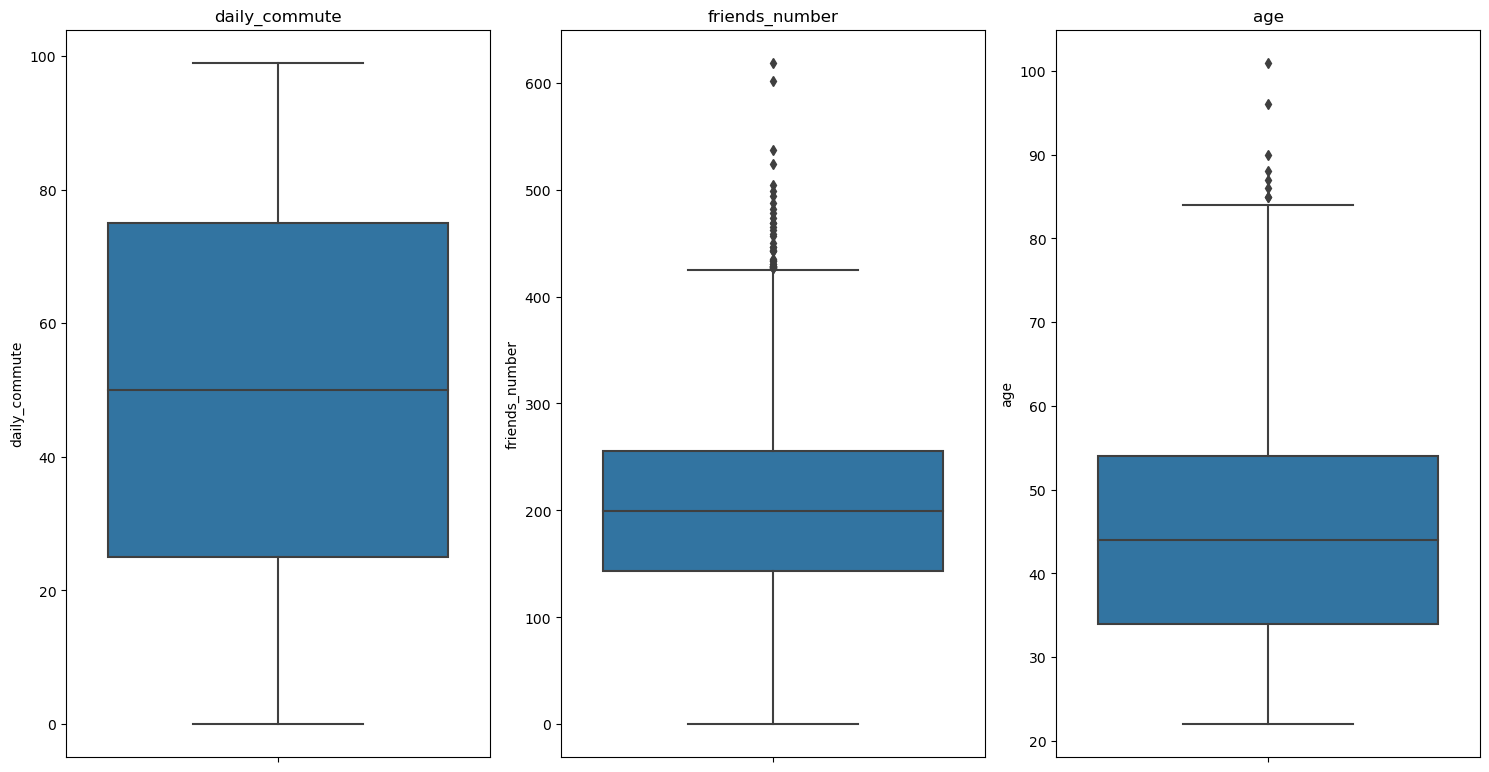

In [48]:
plt.figure(figsize=(15,90))
plotnumber = 1
for outliers in outlier_check:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(y = outliers, data = train)
    plt.title(outliers)
    plotnumber+=1
plt.tight_layout()
plt.show()

We can see that in friends_number and age are outliers. Outliers will be delated to avoid overfitting.

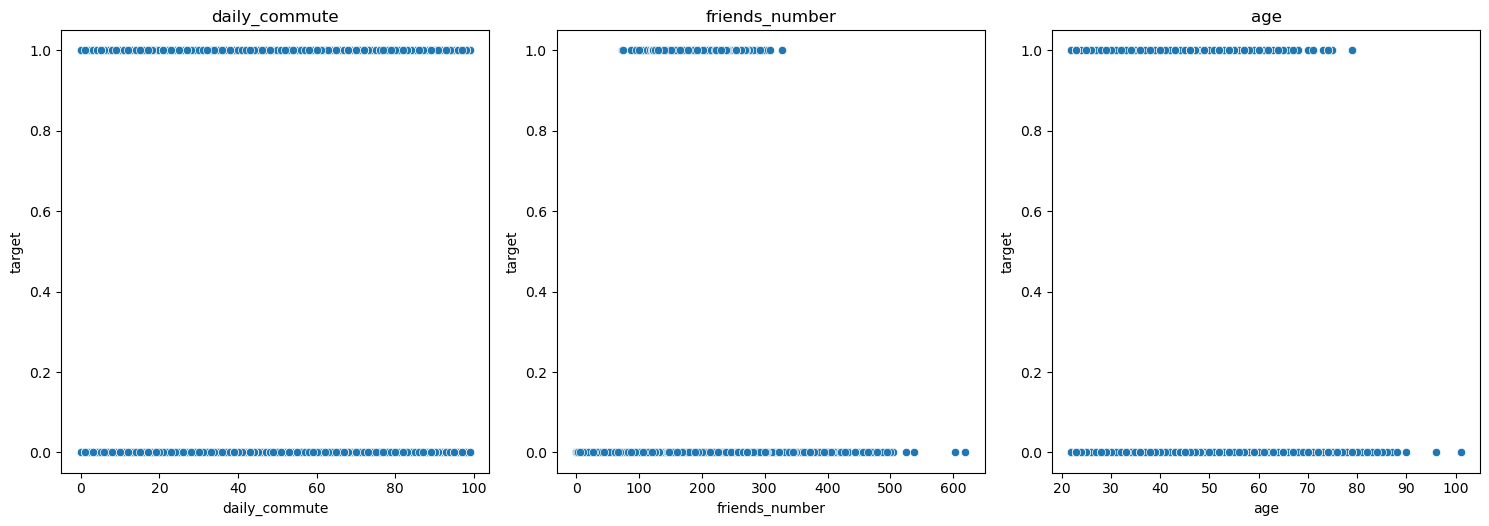

In [49]:
#checking proportions of 1 and 0
plt.figure(figsize=(15,60))
plotnumber = 1
for outliers in outlier_check:
    ax = plt.subplot(12,3,plotnumber)
    sns.scatterplot(x=outliers, y='target', data = train)
    plt.title(outliers)
    plotnumber+=1
plt.tight_layout()
plt.show()


### Daily Commute

In [50]:
# we can see that there are no outliers for daily_commute, mean seem to be reasonable replacement for missing values
#calculating mean for daily_commute

for df in df_list:
    avg_daily_commute=df['daily_commute'].astype('float').mean(axis=0)
    #Nan will be replaced my mean
    df['daily_commute'].replace(np.nan, avg_daily_commute, inplace=True)

### Friends Number

In [51]:
#delating outliers based on boxplot
train[train.friends_number > 520]

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,...,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined,groups_data_10_group_name,groups_data_10_date_joined,age,location_type,location_from_type,groups
511,511,0,Dianna,female,1989-11-15,Legnica,100324,Lublin,339850,Commissioned armed forces officers,...,NaN,NaN,NaN,NaN,NaN,NaN,34.0,3,4,1
988,988,0,Eryka,female,1965-09-11,Malbork,38723,Malbork,38723,Information and communications technology prof...,...,NaN,NaN,NaN,NaN,NaN,NaN,58.0,2,2,3
1123,1123,0,Danuta,female,1963-04-02,Częstochowa,224376,Częstochowa,224376,"Agricultural, forestry and fishery labourers",...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,4,4,6
2708,2708,0,Celina,female,1983-10-30,Siedlce,77653,Nowy Targ,33361,Health professionals,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0,3,2,7


In [52]:
train = train.drop(train[train.friends_number > 520].index)

In [53]:
train.reset_index(drop=True, inplace=True)

### Age

In [54]:
(train.age > 82).sum()

12

In [55]:
train.age.quantile(0.99)

77.0

In [56]:
median_age = train['age'].median()
median_age 

44.0

In [57]:
test['age'].median()

44.0

In [58]:
#delating outliers
train = train.drop(train[train.age > 82].index)

In [59]:
#replacing missing data with median
train['age'].replace(np.nan, median_age , inplace=True)
test['age'].replace(np.nan, median_age , inplace=True)

### Hobbies

In [60]:
#delating all rows with NaN for "hobbies" column. Can't find good replacement for missing data
train = train[train['hobbies'].notna()]
test = test[test['hobbies'].notna()]

In [61]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

### Relationship status 

In [62]:
max_rs = test['relationship_status'].value_counts().idxmax()
max_rs

'In relationship'

In [63]:
train['relationship_status'].value_counts().idxmax()

'In relationship'

In [64]:
train['relationship_status'].replace(np.nan, 'In relationship', inplace=True)
test['relationship_status'].replace(np.nan, 'In relationship', inplace=True)

C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\2614969235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['relationship_status'].replace(np.nan, 'In relationship', inplace=True)


### Education

In [65]:
#replace by frequency
train['education'].value_counts().idxmax()

4.0

In [66]:
max_e = test['education'].value_counts().idxmax()
max_e 

4.0

In [67]:
train['education'].replace(np.nan, max_e , inplace=True)
test['education'].replace(np.nan, max_e , inplace=True)

C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\1226710168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['education'].replace(np.nan, max_e , inplace=True)


### Credit card type

In [68]:
#replace by frequency

max_ctc = train['credit_card_type'].value_counts().idxmax()
max_ctc

'Visa'

In [69]:
test['credit_card_type'].value_counts().idxmax()

'Visa'

In [70]:
train['credit_card_type'].replace(np.nan, max_ctc, inplace=True)
test['credit_card_type'].replace(np.nan, max_ctc, inplace=True)

C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\919882654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['credit_card_type'].replace(np.nan, max_ctc, inplace=True)


In [71]:
train.isnull().sum()

user_id                          0
target                           0
name                            16
sex                              0
dob                            325
location                         0
location_population              0
location_from                    0
location_from_population         0
occupation                       0
hobbies                          0
daily_commute                    0
friends_number                   0
relationship_status              0
education                        0
credit_card_type                 0
groups_data_0_group_name        47
groups_data_0_date_joined       47
groups_data_1_group_name       223
groups_data_1_date_joined      223
groups_data_2_group_name       644
groups_data_2_date_joined      644
groups_data_3_group_name      1316
groups_data_3_date_joined     1316
groups_data_4_group_name      2048
groups_data_4_date_joined     2048
groups_data_5_group_name      2652
groups_data_5_date_joined     2652
groups_data_6_group_

# Review and visualization of data

### Comparison of users interested in subscription and those who are not

With a quick look on below tables we can see some significant differances between two groups.

Customers who are interested in subscription are living in bigger cities (mean population is 403182), are younger (average age is 38. We can also see that many of them are from small cities but moved to bigger ones. They are more active in social media, join more amount of groups (avergae 6). Customers who could be more interetd interested are more likely to be Men are single. 

Top 5 occupation of customers who are intereted in subscription:
- Handicraft and printing workers                                25
- Non-commissioned armed forces officers                         25
- Building and related trades workers, excluding electricians    23
- Armed forces occupations, other ranks                          21
- Refuse workers and other elementary workers                    21



Customers who are not intereted are more likely to be from smaller cities and currently living also in smaller cities. Are older than those who are interetd in subscription (average age is 44). They join less groups (average is 4). Pople who are married with kids are least likely to subscribe. Also women are less interted than men. 

Top 5 occupation of customers who are not intereted in subscription:
- Business and administration professionals             76
- Health associate professionals                        75
- Chief executives, senior officials and legislators    71
- Science and engineering associate professionals       71
- General and keyboard clerks                           69

In [72]:
train1 = train[train['target'] == 1]
train0 = train[train['target'] == 0]

In [73]:
train1.describe(include = "all").round()

C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\3011572418.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train1.describe(include = "all").round()


,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,...,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined,groups_data_10_group_name,groups_data_10_date_joined,age,location_type,location_from_type,groups
count,709.0,709.0,704,709,637,709,709.0,709,709.0,709,...,45,45,9,9,0,0,709.0,709.0,709.0,709.0
unique,NaN,NaN,199,2,619,269,NaN,296,NaN,43,...,42,45,9,9,0,0,NaN,4.0,4.0,NaN
top,NaN,NaN,Adalbert,male,1996-03-06 00:00:00,Warszawa,NaN,Warszawa,NaN,Handicraft and printing workers,...,Fitness and workout anytime,2009-02-02 11:10:21.660189,Offline and online cooking school (Chrzanów),2011-06-21 05:01:35.480002,NaN,NaN,NaN,4.0,2.0,NaN
freq,NaN,NaN,10,424,2,88,NaN,54,NaN,25,...,2,1,1,1,NaN,NaN,NaN,294.0,312.0,NaN
first,NaN,NaN,NaN,NaN,1948-03-24 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2001-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2025.0,1.0,NaN,NaN,NaN,NaN,403182.0,NaN,282716.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,6.0
std,1167.0,0.0,NaN,NaN,NaN,NaN,563842.0,NaN,471922.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,2.0
min,0.0,1.0,NaN,NaN,NaN,NaN,1391.0,NaN,1391.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,1.0
25%,1043.0,1.0,NaN,NaN,NaN,NaN,30310.0,NaN,21534.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,4.0


In [74]:
train0.describe(include = "all").round()

C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\2052567589.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train0.describe(include = "all").round()


,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,...,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined,groups_data_10_group_name,groups_data_10_date_joined,age,location_type,location_from_type,groups
count,2600.0,2600.0,2589,2600,2347,2600,2600.0,2600,2600.0,2600,...,1,1,0,0,0,0,2600.0,2600.0,2600.0,2600.0
unique,NaN,NaN,205,2,2184,562,NaN,550,NaN,43,...,1,1,0,0,0,0,NaN,4.0,4.0,NaN
top,NaN,NaN,Cecylia,female,1971-10-28 00:00:00,Warszawa,NaN,Warszawa,NaN,Business and administration professionals,...,Data science World - the world of data,2010-02-12 10:58:29.892434,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN
freq,NaN,NaN,24,1568,3,195,NaN,192,NaN,76,...,1,1,NaN,NaN,NaN,NaN,NaN,1078.0,1041.0,NaN
first,NaN,NaN,NaN,NaN,1941-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2001-11-10 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1974.0,0.0,NaN,NaN,NaN,NaN,287984.0,NaN,285153.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN,4.0
std,1161.0,0.0,NaN,NaN,NaN,NaN,469034.0,NaN,465258.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,2.0
min,1.0,0.0,NaN,NaN,NaN,NaN,786.0,NaN,1031.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,0.0
25%,953.0,0.0,NaN,NaN,NaN,NaN,23266.0,NaN,24368.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,3.0


In [75]:
train_summary = train.groupby('target')
train_summary.mean().round()

C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\1986197637.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_summary.mean().round()


,user_id,location_population,location_from_population,daily_commute,friends_number,education,age,groups
target,,,,,,,,
0,1974.0,287984.0,285153.0,50.0,199.0,4.0,46.0,4.0
1,2025.0,403182.0,282716.0,51.0,198.0,4.0,38.0,6.0


In [76]:
train1.mode()

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,...,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined,groups_data_10_group_name,groups_data_10_date_joined,age,location_type,location_from_type,groups
0,0,1.0,Adalbert,male,1971-09-28,Warszawa,1764615.0,Warszawa,1764615.0,Handicraft and printing workers,...,"Fitness Singles, Fitness Dates - join us!",2005-11-09 13:34:23.621986,Arnold Schwarzenegger - shock the muscle!,2008-06-05 06:41:30.507669,NaN,NaN,23.0,4,2,5.0
1,2,NaN,NaN,NaN,1974-05-08,NaN,NaN,NaN,NaN,Non-commissioned armed forces officers,...,Fitness and workout anytime,2005-12-25 00:54:48.673497,Babysitters (Elbląg),2009-05-04 09:12:40.511623,NaN,NaN,NaN,NaN,NaN,NaN
2,5,NaN,NaN,NaN,1978-05-15,NaN,NaN,NaN,NaN,NaN,...,Let's excercise together and lose a few kilo q...,2006-09-19 17:40:29.116362,Flowering - indoor and outdoor flower group,2009-06-18 14:55:40.342779,NaN,NaN,NaN,NaN,NaN,NaN
3,8,NaN,NaN,NaN,1978-05-25,NaN,NaN,NaN,NaN,NaN,...,NaN,2006-09-20 23:24:08.342625,Freelance writers group,2009-11-28 22:51:59.536491,NaN,NaN,NaN,NaN,NaN,NaN
4,23,NaN,NaN,NaN,1982-08-29,NaN,NaN,NaN,NaN,NaN,...,NaN,2007-02-09 20:05:15.945883,Offline and online cooking school (Chrzanów),2010-03-29 14:48:30.104178,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,3984,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,3987,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706,3990,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707,3997,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Correlation

Based on below table and plt we can see that biggest impact on target have age and groups. Education, friens number and location from population have lowest correlation with target.

**Positive correlation:**

Users who joined more groups are more likely be interested in the long-term gym subscription. Also users from larger cities are more indicates higher interest.

**Negative correlation:**

Based on table and lot we can see that younger customers are more likely to subsribe

In [77]:
train.corr()

#no strong correlations between different variables. Strongest correlation is bwteeen location_from_population and location_population.
#meaning that many users didn't move to different city.

C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\3844878316.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,user_id,target,location_population,location_from_population,daily_commute,friends_number,education,age,groups
user_id,1.000000,0.017848,-0.004927,-0.024771,0.009353,0.030092,-0.047137,-0.012546,0.002435
target,0.017848,1.000000,0.095877,-0.002143,0.016672,-0.005023,0.003564,-0.255182,0.428132
location_population,-0.004927,0.095877,1.000000,0.465117,0.002530,0.008532,0.024545,-0.018826,0.057613
location_from_population,-0.024771,-0.002143,0.465117,1.000000,-0.001298,0.020884,0.033712,-0.013009,0.014090
daily_commute,0.009353,0.016672,0.002530,-0.001298,1.000000,-0.001683,-0.016188,0.008724,0.021393
friends_number,0.030092,-0.005023,0.008532,0.020884,-0.001683,1.000000,0.025577,0.018165,-0.016829
education,-0.047137,0.003564,0.024545,0.033712,-0.016188,0.025577,1.000000,0.016256,-0.004182
age,-0.012546,-0.255182,-0.018826,-0.013009,0.008724,0.018165,0.016256,1.000000,-0.118689
groups,0.002435,0.428132,0.057613,0.014090,0.021393,-0.016829,-0.004182,-0.118689,1.000000


C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\2885894395.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corrwith(train.target).plot.bar(figsize = (18,8),


<Axes: title={'center': 'Correlation with response variable'}>

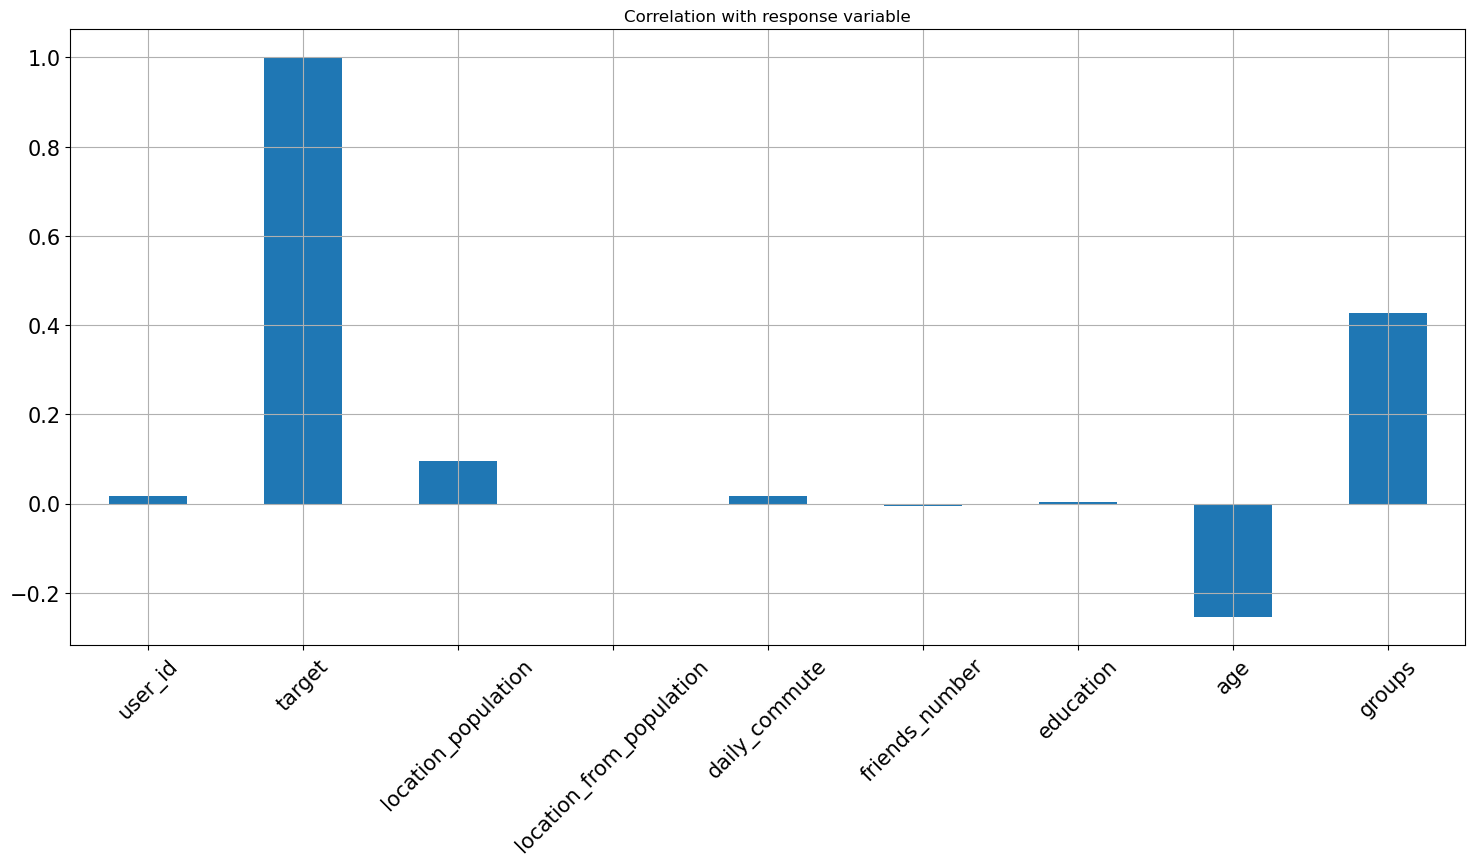

In [78]:
train.corrwith(train.target).plot.bar(figsize = (18,8),
                                                     title = 'Correlation with response variable',
                                                     fontsize = 15, rot = 45,
                                                     grid = True)

C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\2057373253.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

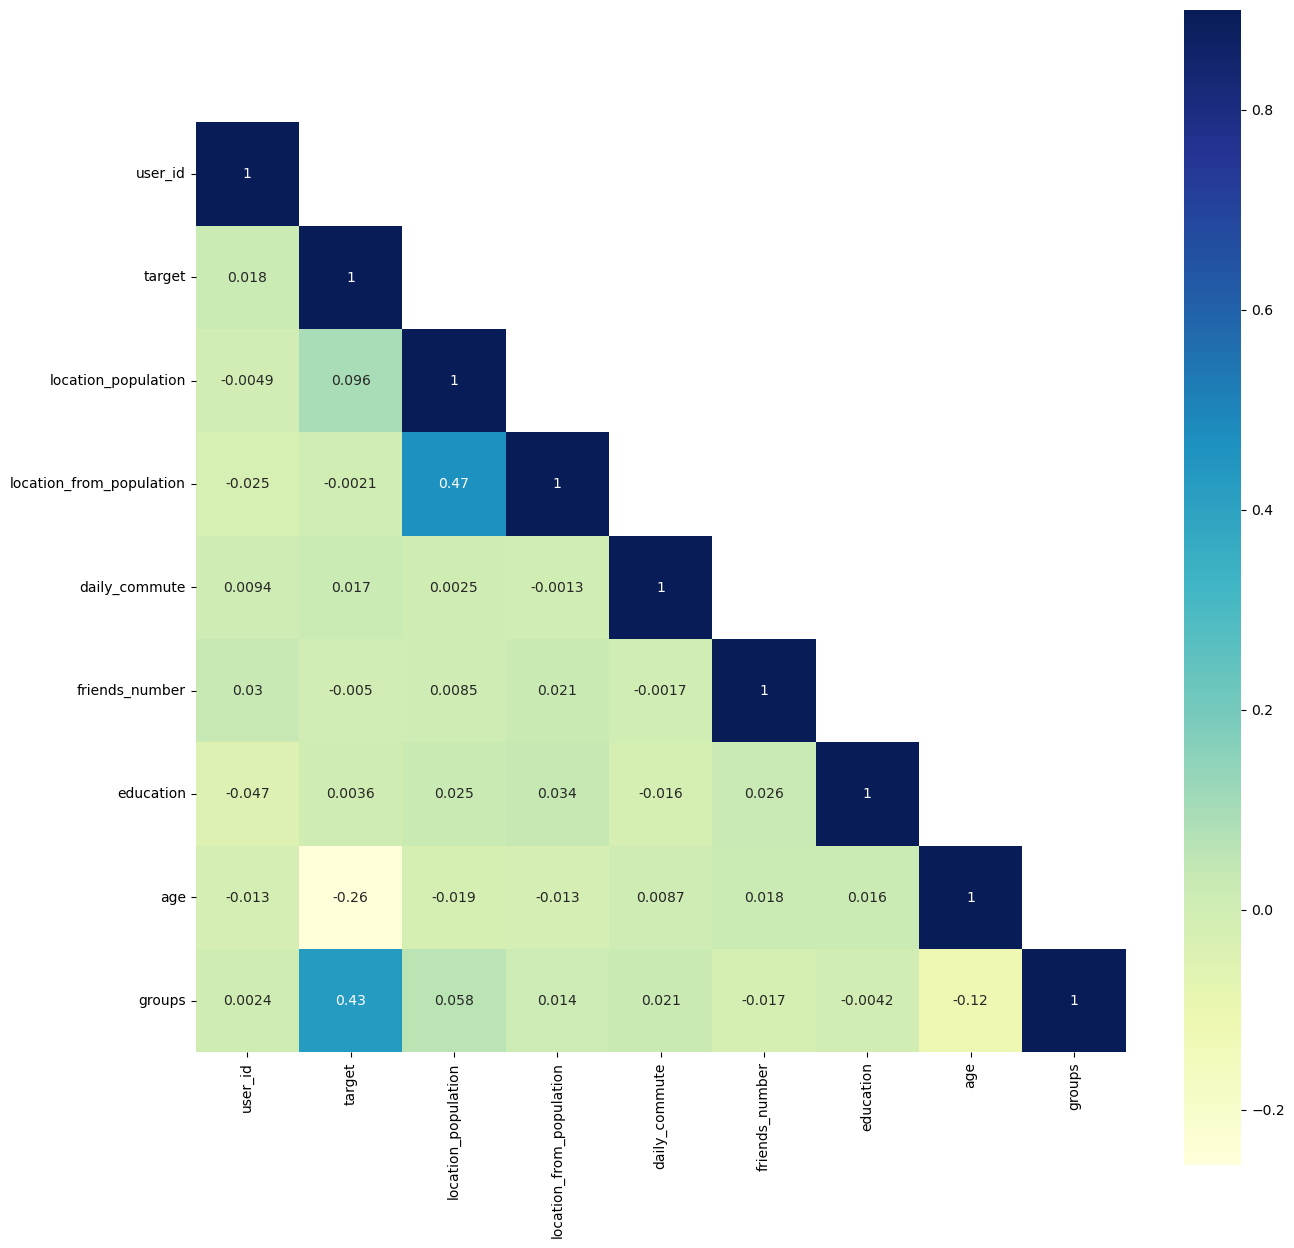

In [79]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [80]:
categorical_features = ['sex', 'relationship_status', 'credit_card_type', 'location_type', 'location_from_type', \
                        'education']

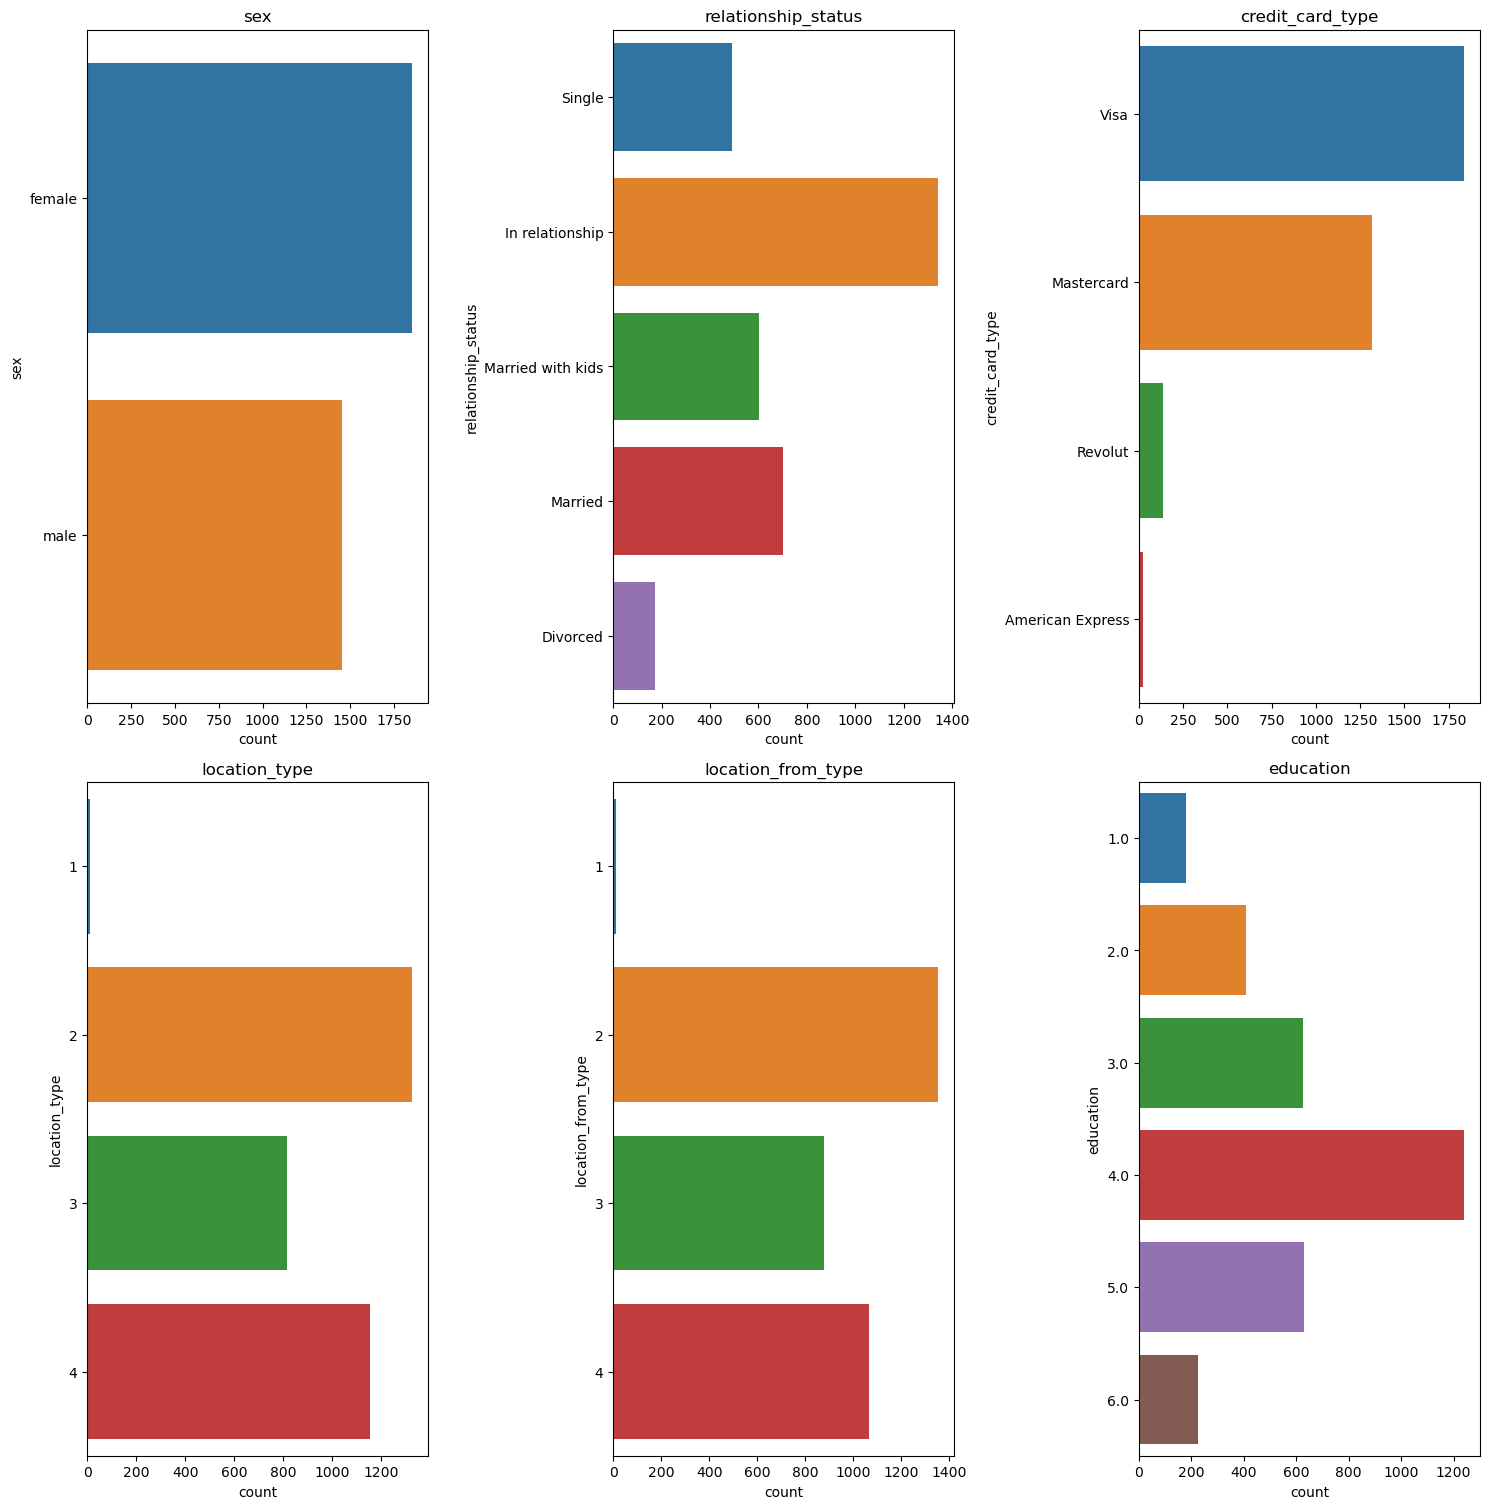

In [81]:
plt.figure(figsize=(15,90))
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y = categorical_feature,data = train)
    plt.title(categorical_feature)
    plotnumber+=1
plt.tight_layout()
plt.show()

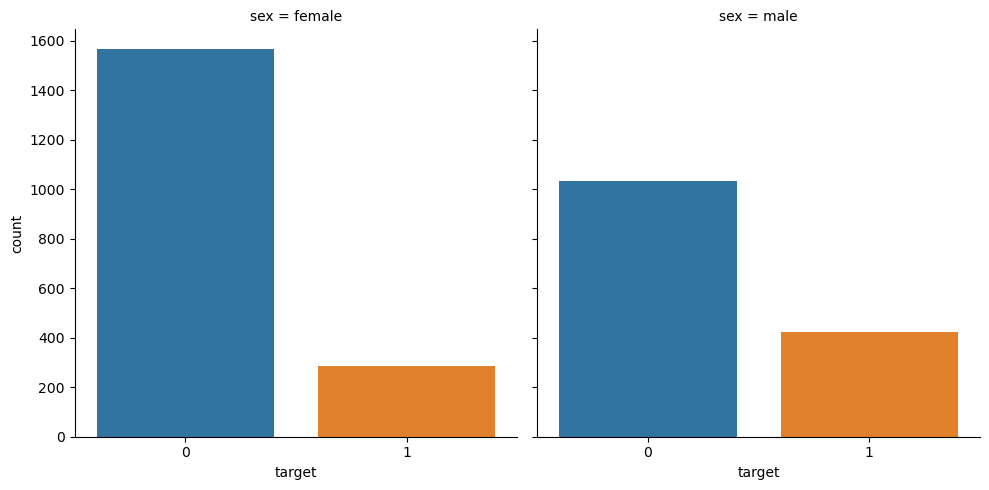

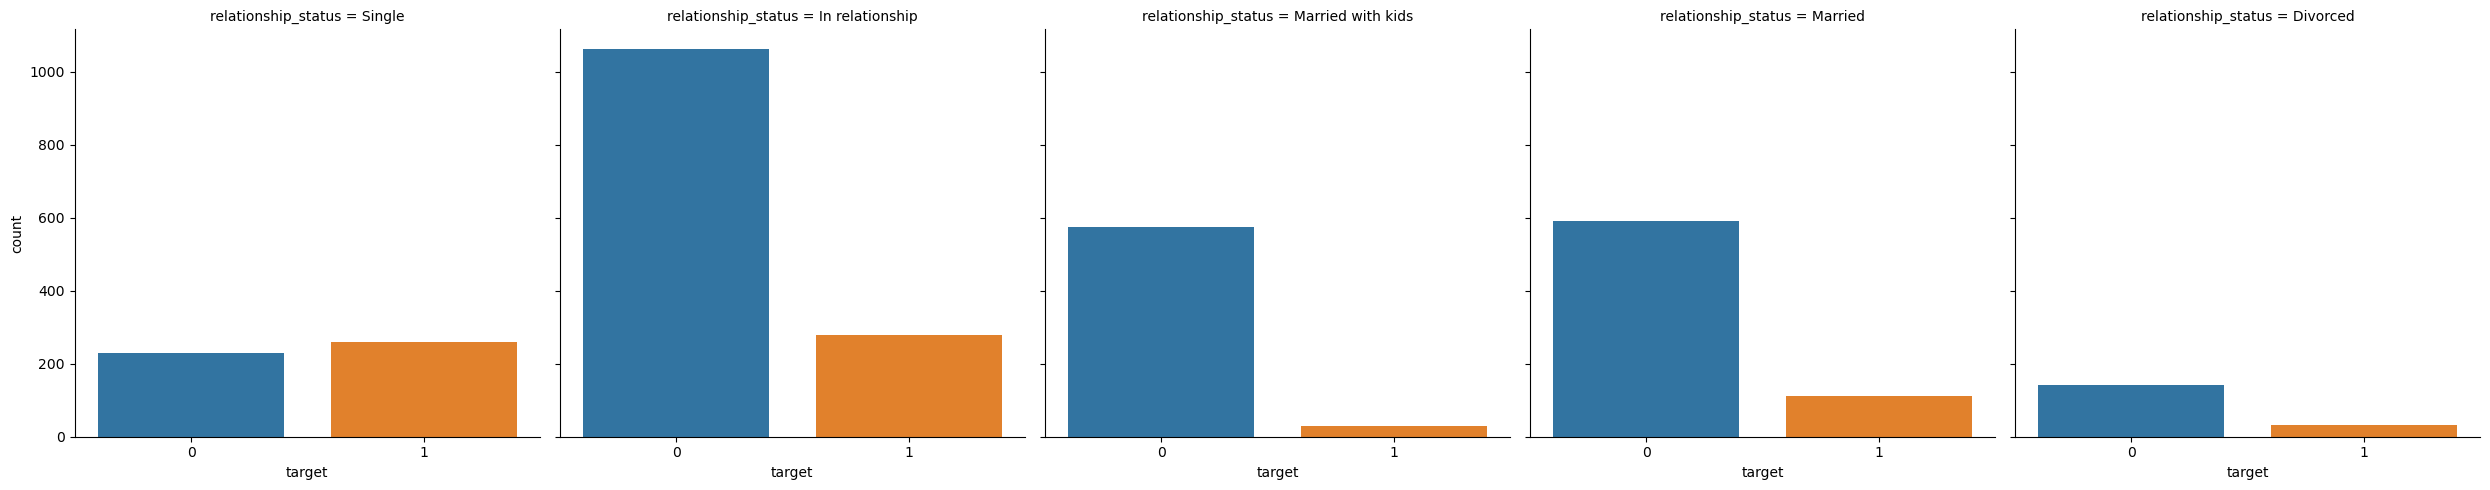

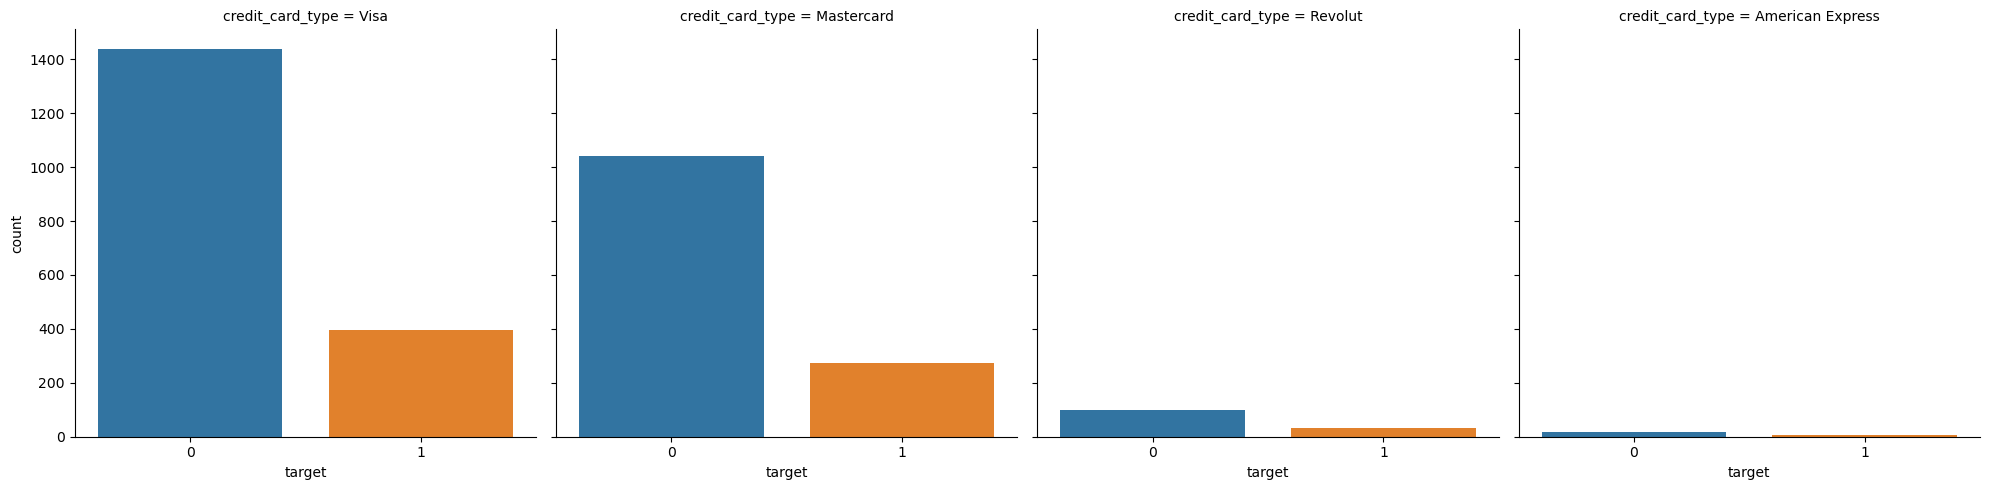

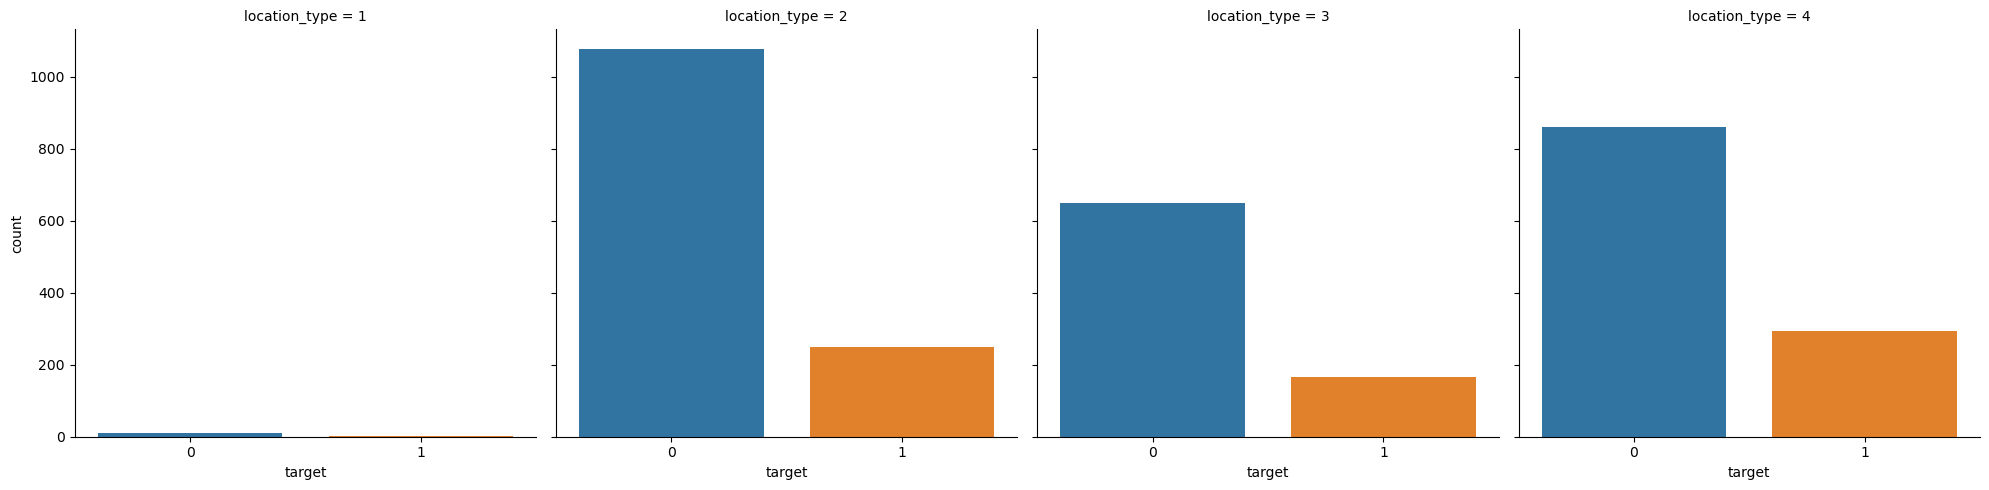

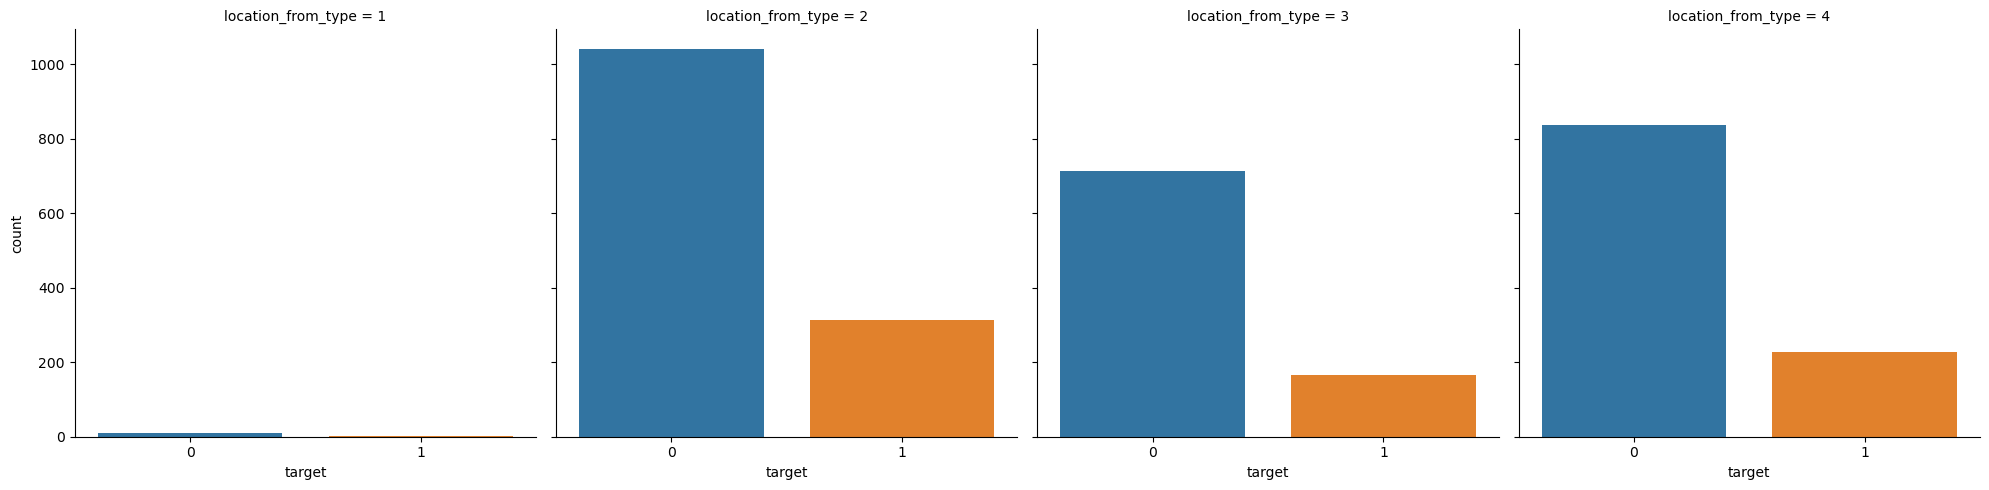

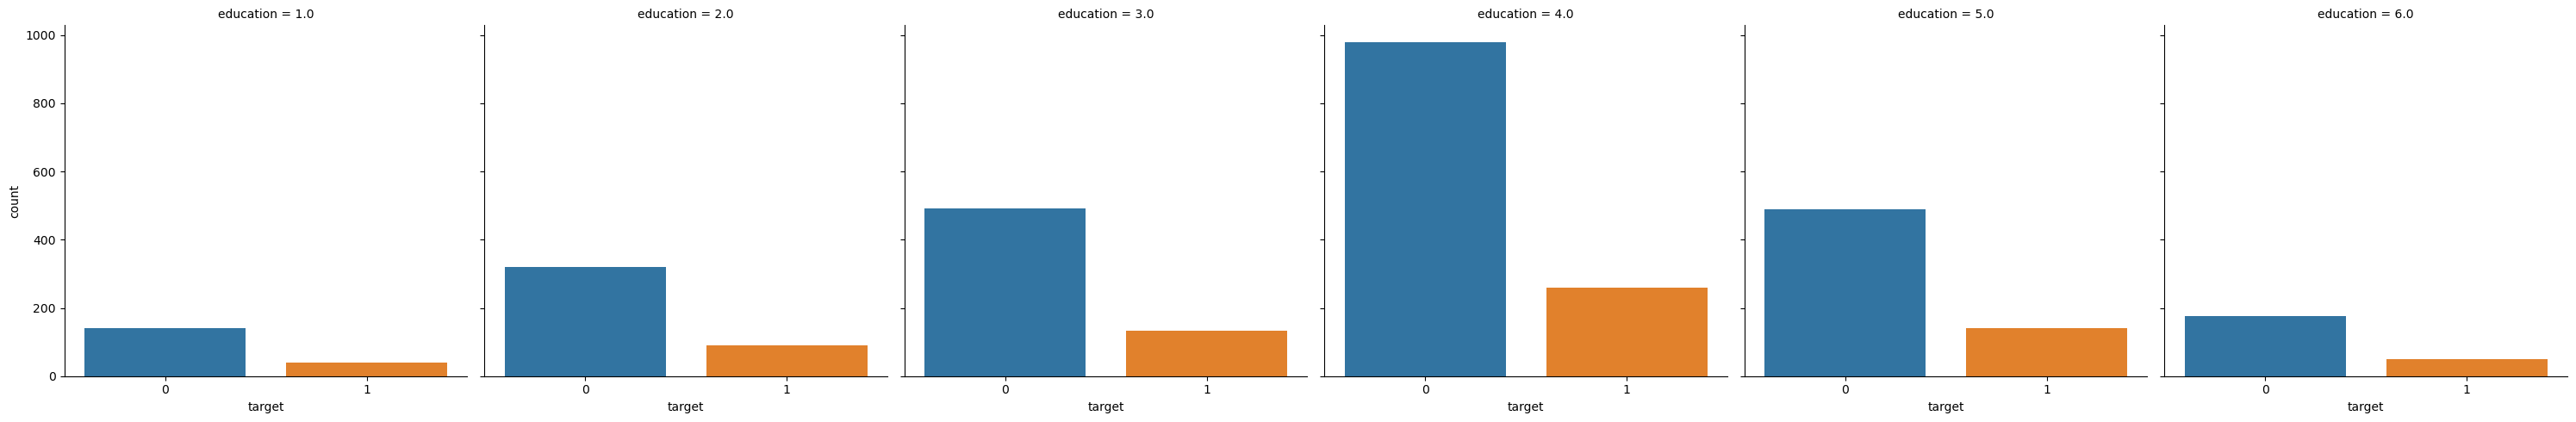

In [82]:
for categorical_feature in categorical_features:
    sns.catplot(x='target', col=categorical_feature, kind='count', data= train)
plt.show()

In [83]:
train0['occupation'].value_counts().head()

Business and administration professionals             76
Health associate professionals                        75
Chief executives, senior officials and legislators    71
Science and engineering associate professionals       71
General and keyboard clerks                           69
Name: occupation, dtype: int64

In [84]:
train1['occupation'].value_counts().head()

Handicraft and printing workers                                25
Non-commissioned armed forces officers                         25
Building and related trades workers, excluding electricians    23
Armed forces occupations, other ranks                          21
Refuse workers and other elementary workers                    21
Name: occupation, dtype: int64

In [85]:
numerical_features=['daily_commute', 'friends_number', 'age']

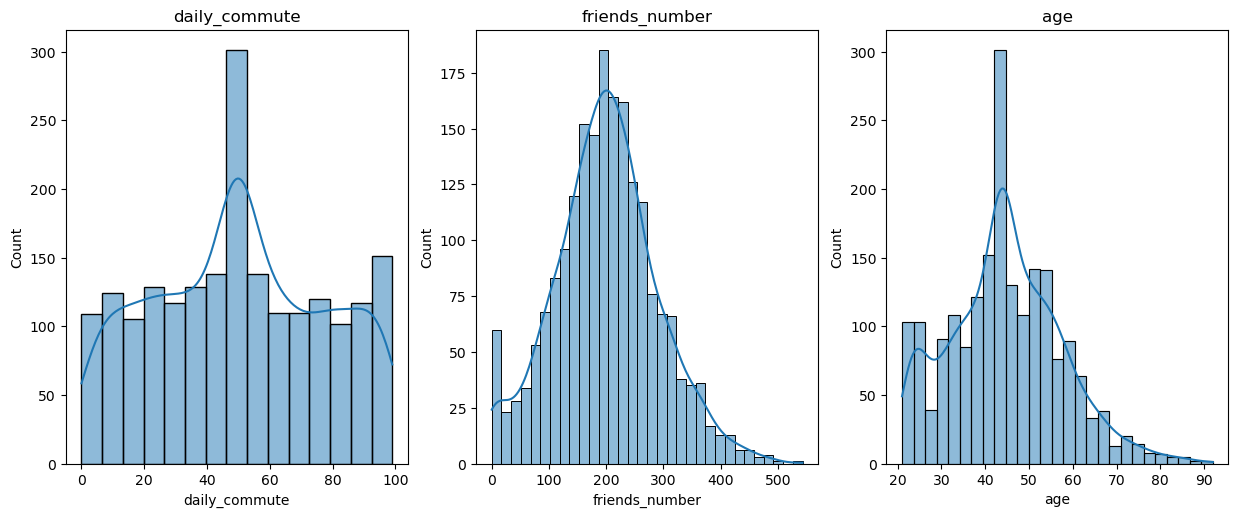

In [86]:
plt.figure(figsize=(15,80))
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(x = numerical_feature,data = df,kde=True)
    plt.title(numerical_feature)
    plotnumber+=1
plt.show()

# Splitting hobby column/ dummy data

In [159]:
hobbies = train[['user_id', 'hobbies']]
hobbies

,user_id,hobbies
0,0,Fitness
1,1,"LARPing,Foreign language learning,Netball"
2,2,"Bodybuilding,Kabaddi"
3,3,Badminton
4,4,"Fitness,Embroidery,Lacemaking"
...,...,...
3304,3993,Lego building
3305,3994,Gym
3306,3997,"Photography,Graffiti"
3307,3998,Stretching


In [160]:
dummies = pd.get_dummies(hobbies['hobbies'])

In [161]:
atom_col = [c for c in dummies.columns if ',' not in c]

for col in atom_col:
    hobbies[col] = dummies[[c for c in dummies.columns if col in c]].sum(axis=1)

C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\229765611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hobbies[col] = dummies[[c for c in dummies.columns if col in c]].sum(axis=1)
C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\229765611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hobbies[col] = dummies[[c for c in dummies.columns if col in c]].sum(axis=1)
C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\229765611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [162]:
hobbies['Acting'].value_counts()

0    3278
1      31
Name: Acting, dtype: int64

In [163]:
hobbies = hobbies.drop('hobbies', axis=1)

In [164]:
hobbies

,user_id,3D printing,Acting,Air sports,Amateur radio,Archery,Astronomy,BASE jumping,Backpacking,Badminton,...,Wood carving,Woodworking,Worldbuilding,Writing,Yo-yoing,Yoga,amateur radio,role-playing games,scrapbook,tabletop games
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,3993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3305,3994,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3306,3997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3307,3998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
hobbies = hobbies.drop('user_id', axis=1)

In [166]:
train = pd.concat([train, hobbies], axis = 1)

In [171]:
#same for test data set
hobbies_test = test[['user_id', 'hobbies']]
hobbies_test

,user_id,hobbies
0,0,Stretching
1,1,"Gym,Kettleballs,Jewelry making"
2,2,Fashion
3,3,"Gym,Badminton,Rowing,Slacklining,Playing music..."
4,4,"Orienteering,Skateboarding"
...,...,...
1679,1995,"Fitness,Stretching,Kettleballs"
1680,1996,"Weightlifting,Computer programming,Magic"
1681,1997,"Scrapbooking,Model building,Board games"
1682,1998,"Kettleballs,Gym,Playing musical instruments,Sl..."


In [172]:
dummies_test = pd.get_dummies(hobbies_test['hobbies'])

In [173]:
atom_col_test = [c for c in dummies_test.columns if ',' not in c]

for col in atom_col_test:
    hobbies_test[col] = dummies_test[[c for c in dummies_test.columns if col in c]].sum(axis=1)

C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\2543034064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hobbies_test[col] = dummies_test[[c for c in dummies_test.columns if col in c]].sum(axis=1)
C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\2543034064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hobbies_test[col] = dummies_test[[c for c in dummies_test.columns if col in c]].sum(axis=1)
C:\Users\kasia\AppData\Local\Temp\ipykernel_31332\2543034064.py:4: SettingWithCopyWarning: 
A value is

In [174]:
hobbies_test = hobbies_test.drop(['user_id', 'hobbies'], axis=1)

In [ ]:
hobbies_test = hobbies_test.

# 4. Model Building - preparing data sets

In [117]:
train_data = train[['target', 'sex', 'occupation', 'daily_commute', 'friends_number', 'relationship_status', 'education', \
             'credit_card_type', 'age', 'location_type', 'location_from_type', 'groups']]
train_data = pd.concat([train_data, hobbies], axis = 1)
train_data

,target,sex,occupation,daily_commute,friends_number,relationship_status,education,credit_card_type,age,location_type,...,Wood carving,Woodworking,Worldbuilding,Writing,Yo-yoing,Yoga,amateur radio,role-playing games,scrapbook,tabletop games
0,1,female,Teaching professionals,46.0,196,Single,4.0,Visa,41.0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,male,General and keyboard clerks,55.0,243,Single,4.0,Visa,52.0,2,...,0,0,0,0,0,0,0,0,0,0
2,1,male,Protective services workers,90.0,191,In relationship,3.0,Visa,23.0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,female,Customer services clerks,88.0,164,In relationship,3.0,Visa,31.0,4,...,0,0,0,0,0,0,0,0,0,0
4,0,male,Refuse workers and other elementary workers,40.0,119,Married with kids,5.0,Visa,48.0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,0,female,Protective services workers,62.0,161,In relationship,5.0,Visa,33.0,4,...,0,0,0,0,0,0,0,0,0,0
3305,0,female,Science and engineering associate professionals,59.0,271,Married,3.0,Visa,50.0,2,...,0,0,0,0,0,0,0,0,0,0
3306,1,female,Personal service workers,79.0,140,Single,4.0,Visa,57.0,3,...,0,0,0,0,0,0,0,0,0,0
3307,0,female,Handicraft and printing workers,30.0,272,Divorced,6.0,Mastercard,52.0,4,...,0,0,0,0,0,0,0,0,0,0


In [118]:
train_data.isnull().sum()

target                0
sex                   0
occupation            0
daily_commute         0
friends_number        0
                     ..
Yoga                  0
amateur radio         0
role-playing games    0
scrapbook             0
tabletop games        0
Length: 184, dtype: int64

In [119]:
#categorical variable
cat_var = ['sex', 'occupation', 'relationship_status', 'credit_card_type']

In [120]:
le = LabelEncoder()

for feature in cat_var:
    print(feature)
    train_data[feature] = le.fit_transform( train_data[feature])
    integer_mapping = {l: i for i, l in enumerate(le.classes_)}
    print(integer_mapping)
    print()

sex
{'female': 0, 'male': 1}

occupation
{'Administrative and commercial managers': 0, 'Agricultural, forestry and fishery labourers': 1, 'Armed forces occupations, other ranks': 2, 'Assemblers': 3, 'Building and related trades workers, excluding electricians': 4, 'Business and administration associate professionals': 5, 'Business and administration professionals': 6, 'Chief executives, senior officials and legislators': 7, 'Cleaners and helpers': 8, 'Commissioned armed forces officers': 9, 'Customer services clerks': 10, 'Drivers and mobile plant operators': 11, 'Electrical and electronic trades workers': 12, 'Food preparation assistants': 13, 'Food processing, wood working, garment and other craft and related trades workers': 14, 'General and keyboard clerks': 15, 'Handicraft and printing workers': 16, 'Health associate professionals': 17, 'Health professionals': 18, 'Hospitality, retail and other services managers': 19, 'Information and communications technicians': 20, 'Information 

In [121]:
train_data

,target,sex,occupation,daily_commute,friends_number,relationship_status,education,credit_card_type,age,location_type,...,Wood carving,Woodworking,Worldbuilding,Writing,Yo-yoing,Yoga,amateur radio,role-playing games,scrapbook,tabletop games
0,1,0,42,46.0,196,4,4.0,3,41.0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,1,15,55.0,243,4,4.0,3,52.0,2,...,0,0,0,0,0,0,0,0,0,0
2,1,1,34,90.0,191,1,3.0,3,23.0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,10,88.0,164,1,3.0,3,31.0,4,...,0,0,0,0,0,0,0,0,0,0
4,0,1,35,40.0,119,3,5.0,3,48.0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,0,0,34,62.0,161,1,5.0,3,33.0,4,...,0,0,0,0,0,0,0,0,0,0
3305,0,0,37,59.0,271,2,3.0,3,50.0,2,...,0,0,0,0,0,0,0,0,0,0
3306,1,0,32,79.0,140,4,4.0,3,57.0,3,...,0,0,0,0,0,0,0,0,0,0
3307,0,0,16,30.0,272,0,6.0,1,52.0,4,...,0,0,0,0,0,0,0,0,0,0


In [122]:
labels = train_data['target']

In [123]:
train_data = train_data.drop(['target'],axis = 1)

In [124]:
labels

0       1
1       0
2       1
3       0
4       0
       ..
3304    0
3305    0
3306    1
3307    0
3308    1
Name: target, Length: 3309, dtype: int64

# 5.  a) Logistic Regression

In [125]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [198]:
lr = LogisticRegression()

In [199]:
X = np.asarray(train_data)
X[0:1]

array([[  0.,  42.,  46., 196.,   4.,   4.,   3.,  41.,   2.,   2.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [200]:
y = np.asarray(labels)
y

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [201]:
#normalize the dataset:
#from sklearn import preprocessing
#X = preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

## Split dataset into training and test set

In [202]:
X_train, x_test, Y_train, y_test = train_test_split( X, y,test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2647, 183) (2647,)
Test set: (662, 183) (662,)


In [203]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [204]:
prediction = LR.predict(x_test)

In [205]:
# predict_proba returns estimates for all classes, ordered by the label of classes
prediction_prob = LR.predict_proba(x_test)
prediction_prob

array([[0.84, 0.16],
       [0.34, 0.66],
       [0.81, 0.19],
       ...,
       [0.46, 0.54],
       [0.84, 0.16],
       [0.79, 0.21]])

In [206]:
accuracy_score(y_test, prediction)

0.8353474320241692

## Evaluation of logistic model

Checking jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [134]:
jaccard_score(y_test, prediction ,pos_label=0)

0.8201320132013201

In [135]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, prediction, labels=[1,0]))

[[ 56  88]
 [ 21 497]]


Confusion matrix, without normalization
[[ 56  88]
 [ 21 497]]


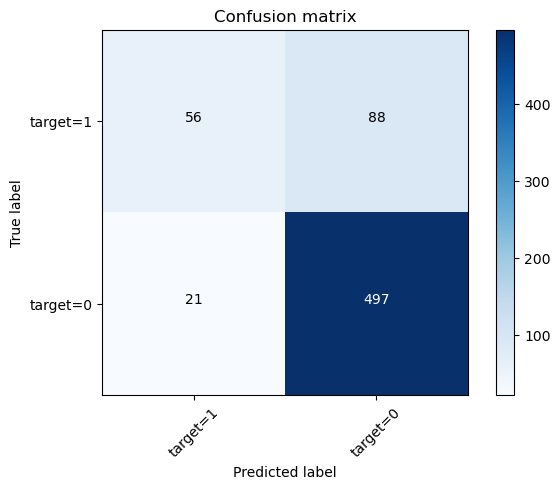

In [136]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix')


Based on matrix we can see that there are:
- 492 true negatives
- 55 true positives
- 89 false negatives
- 26 false positives

In [137]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       518
           1       0.73      0.39      0.51       144

    accuracy                           0.84       662
   macro avg       0.79      0.67      0.70       662
weighted avg       0.82      0.84      0.82       662



Precision is a measure of the accuracy provided that a class label has been predicted. 

Recall is the true positive rate.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

## log loss
 Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [138]:
log_loss(y_test, prediction_prob)

0.3896951593944403

In [139]:
Xlog = sm.add_constant(train_data) 
logr_model = sm.Logit(labels, Xlog)


In [140]:
#checking which columns are not important to establish probablity
logr_fit = logr_model.fit()
print(logr_fit.pvalues > 0.05)

Optimization terminated successfully.
         Current function value: 0.287907
         Iterations 8
const                 False
sex                   False
occupation             True
daily_commute          True
friends_number         True
                      ...  
Yoga                   True
amateur radio          True
role-playing games     True
scrapbook              True
tabletop games         True
Length: 184, dtype: bool


In [143]:
pd.DataFrame(logr_fit.pvalues > 0.05).head(50)

,0
const,False
sex,False
occupation,True
daily_commute,True
friends_number,True
relationship_status,False
education,True
credit_card_type,True
age,False
location_type,False


We can see thta occupation, daily commute, friends number education and credit card type are not relevant for the model and are not good predictions. 

#  b) Making predictions on test dataframe using LR model

In [182]:
test_data = test[['target', 'sex', 'occupation', 'daily_commute', 'friends_number', 'relationship_status', 'education', \
             'credit_card_type', 'age', 'location_type', 'location_from_type', 'groups']]

test_data = pd.concat([test_data, hobbies_test], axis = 1)
test_data

,target,sex,occupation,daily_commute,friends_number,relationship_status,education,credit_card_type,age,location_type,...,Whittling,Wood carving,Woodworking,Worldbuilding,Writing,Yo-yoing,Yoga,amateur radio,scrapbook,tabletop games
0,NaN,male,Numerical and material recording clerks,49.928731,146,Single,1.0,Visa,50.0,2,...,0,0,0,0,0,0,0,0,0,0
1,NaN,male,"Food processing, wood working, garment and oth...",49.928731,209,Married with kids,2.0,Visa,32.0,2,...,0,0,0,0,0,0,0,0,0,0
2,NaN,female,Health professionals,39.000000,213,Married,4.0,Visa,44.0,2,...,0,0,0,0,0,0,0,0,0,0
3,NaN,female,Protective services workers,42.000000,287,Single,4.0,Mastercard,29.0,2,...,0,0,0,0,0,0,0,0,0,0
4,NaN,male,Information and communications technicians,49.928731,226,In relationship,4.0,Mastercard,35.0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,NaN,male,"Food processing, wood working, garment and oth...",98.000000,194,In relationship,4.0,Visa,44.0,4,...,0,0,0,0,0,0,0,0,0,0
1680,NaN,male,Street and related sales and service workers,89.000000,200,Single,4.0,Visa,23.0,4,...,0,0,0,0,0,0,0,0,0,0
1681,NaN,male,Drivers and mobile plant operators,17.000000,270,Married with kids,5.0,Mastercard,24.0,3,...,0,0,0,0,0,0,0,0,0,0
1682,NaN,female,"Food processing, wood working, garment and oth...",49.928731,202,In relationship,3.0,Visa,28.0,2,...,0,0,0,0,0,0,0,0,0,0


In [176]:
le = LabelEncoder()

for feature in cat_var:
    print(feature)
    test_data[feature] = le.fit_transform( test_data[feature])
    integer_mapping = {l: i for i, l in enumerate(le.classes_)}
    print(integer_mapping)
    print()

sex
{'female': 0, 'male': 1}

occupation
{'Administrative and commercial managers': 0, 'Agricultural, forestry and fishery labourers': 1, 'Armed forces occupations, other ranks': 2, 'Assemblers': 3, 'Building and related trades workers, excluding electricians': 4, 'Business and administration associate professionals': 5, 'Business and administration professionals': 6, 'Chief executives, senior officials and legislators': 7, 'Cleaners and helpers': 8, 'Commissioned armed forces officers': 9, 'Customer services clerks': 10, 'Drivers and mobile plant operators': 11, 'Electrical and electronic trades workers': 12, 'Food preparation assistants': 13, 'Food processing, wood working, garment and other craft and related trades workers': 14, 'General and keyboard clerks': 15, 'Handicraft and printing workers': 16, 'Health associate professionals': 17, 'Health professionals': 18, 'Hospitality, retail and other services managers': 19, 'Information and communications technicians': 20, 'Information 

In [177]:
labels_t = test_data['target']

In [178]:
test_data = test_data.drop(['target'],axis = 1)

In [179]:
test_prediction = pd.DataFrame()

In [180]:
test_prediction['user_id'] = test['user_id']

In [181]:
test_prediction['prob']= LR.predict_proba(test_data)[:,1]

C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 157 features, but LogisticRegression is expecting 183 features as input.

In [ ]:
test_prediction['classification'] = LR.predict(test_data)

In [ ]:
test_prediction['classification'].value_counts()

In [142]:
test_prediction

,user_id,prob,classification
0,0,0.126187,0
1,1,0.672503,1
2,2,0.217324,0
3,3,0.741844,1
4,4,0.168146,0
...,...,...,...
1679,1995,0.263434,0
1680,1996,0.578413,1
1681,1997,0.501580,1
1682,1998,0.553768,1


##  Result of LR model on test data set
Based on logistic regression we can predit that from test data 1482 users won't be instered in subscription and 202 might be potentially interested. 

# 6. a) Building Decision Trees Classifier model

In [183]:
tree5 = DecisionTreeClassifier(max_depth=5, random_state=0)

In [184]:
tree5.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [185]:
predict = tree5.predict(x_test)

In [186]:
accuracy_score(y_test, predict)

0.8444108761329305

In [187]:
tree4 = DecisionTreeClassifier(max_depth=4, random_state=0) #tree

In [188]:
tree4.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [189]:
predict = tree4.predict(x_test)

In [190]:
accuracy_score(y_test, predict)

0.8383685800604229

In [191]:
#calculating accuracy for each depth

#we can see that highets accuracy is for depth 5

depth = [3, 4, 5, 6, 7]

for d in depth:
    tree = DecisionTreeClassifier(max_depth=d, random_state=0) #tree
    tree.fit(X_train,Y_train)
    predict = tree.predict(x_test)
    ac = accuracy_score(y_test, predict)
    print(ac)

0.8323262839879154
0.8383685800604229
0.8444108761329305
0.8444108761329305
0.8293051359516617


In [192]:
import sklearn.tree as tree

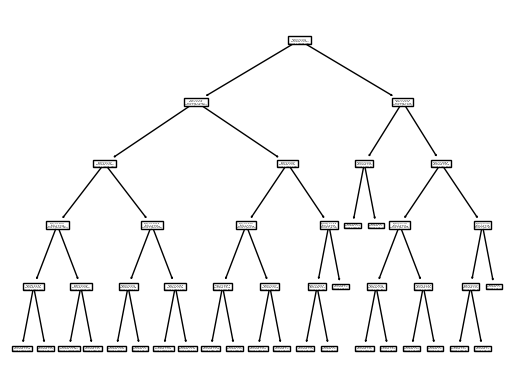

In [193]:
tree.plot_tree(tree5)
plt.show()

In [194]:
#checking the time of training
t0 = time.time()
tree5.fit(X_train, Y_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  0.10252


In [195]:
prediction_prob_tree = tree5.predict_proba(x_test)[:,1]

In [196]:
# Curve (ROC-AUC) score from the predictions
tree_roc_auc = roc_auc_score(y_test, prediction_prob_tree)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(tree_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.793


Confusion matrix, without normalization
[[ 80  64]
 [ 49 469]]


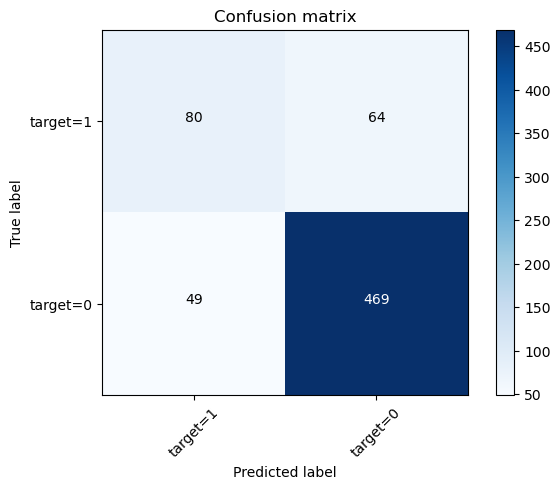

In [197]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix')


Based on matrix we can see that there are:
- 473 true negatives
- 80 true positives
- 64 false negatives
- 45 false positives

In [158]:
print (classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       518
           1       0.64      0.56      0.59       144

    accuracy                           0.84       662
   macro avg       0.76      0.73      0.75       662
weighted avg       0.83      0.84      0.83       662



# b)  Making predictions on test dataframe using Decision Tree model

In [159]:
test_prediction_tree = pd.DataFrame()

In [160]:
test_prediction_tree['user_id'] = test['user_id']

In [161]:
test_prediction_tree['prob']= tree5.predict_proba(test_data)[:,1]

C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [162]:
test_prediction_tree['classification'] = tree5.predict(test_data)

C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [163]:
test_prediction_tree

,user_id,prob,classification
0,0,0.347826,0
1,1,0.855556,1
2,2,0.358209,0
3,3,0.000000,0
4,4,0.070838,0
...,...,...,...
1679,1995,0.358209,0
1680,1996,0.561151,1
1681,1997,0.200000,0
1682,1998,0.358209,0


In [164]:
test_prediction_tree['classification'].value_counts()

0    1454
1     230
Name: classification, dtype: int64

##  Result of Decision Tree model on test data set
Based on logistic regression we can predit that from test data 1454 users won't be instered in subscription and 230 might be potentially interested. 

# 7. Summary

Best model to predict ineterst of subscription gives Decision Tree model. Below tables show that Classification Decision Tree model has better accuracy and can predict target better than logistic Regression Model.

Logistic Regression:

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       518
           1       0.68      0.38      0.49       144

    accuracy                           0.83       662
    macr avg       0.76      0.67      0.69       662
    weig avg       0.81      0.83      0.81       662


Decision Tree:

             precision    recall  f1-score   support

           0       0.88      0.91      0.90       518
           1       0.64      0.56      0.59       144

    accuracy                           0.84       662
    macr avg       0.76      0.73      0.75       662
    weigh avg      0.83      0.84      0.83       662

Based on analysis we can see that some veriable are not important for the model. Occupation, daily commute, friends number education and credit card type are not relevant for prediction.

Hobbies were not merged to training data set because of too many different values.